#### Importing some basic libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

#### Loading all the related data's given by my institute

In [2]:
df_ipc=pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [3]:
df_women=pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2012.csv')

In [4]:
df_sc=pd.read_csv('02_01_District_wise_crimes_committed_against_SC_2001_2012.csv')

In [5]:
df_st=pd.read_csv('02_District_wise_crimes_committed_against_ST_2001_2012.csv')

In [6]:
df_children=pd.read_csv('03_District_wise_crimes_committed_against_children_2001_2012.csv')

In [7]:
df_ipc['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY'],
      dtype=object)

#### Changing DELHI UT into DELHI

In [8]:
for i in range(len(df_ipc['STATE/UT'])):
    if(df_ipc['STATE/UT'][i]=='DELHI UT'):
        df_ipc['STATE/UT'][i]='DELHI'

In [9]:
df_ipc['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [10]:
df_ipc.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

#### Removing all the rows where district is Total

In [11]:
df_ipc = df_ipc[df_ipc['DISTRICT']!='TOTAL']

In [12]:
df_ipc

STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001     101                 60   
1     ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2     ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3     ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   
...              ...            ...   ...     ...                ...   
9010           DELHI            STF  2012       0                  1   
9011           DELHI           WEST  2012      52                 37   
9012     LAKSHADWEEP    LAKSHADWEEP  2012       0                  0   
9014      PUDUCHERRY       KARAIKAL  2012       5                  6   
9015      PUDUCHERRY     PUDUCHERRY  2012      24                 21   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                            17    50               0   
1                                             1    23               0   
2                                             2    27               0   
3                                             1    20               0   
4                                             1    23               0   
...                                         ...   ...             ...   
9010                                          0     0               0   
9011                                         10    79               0   
9012                                          0     0               0   
9014                                          2     6               0   
9015                                         10     7               0   

      OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0             50                      46  ...     30                1131   
1             23                      53  ...     69                1543   
2             27                      59  ...     38                2088   
3             20                      25  ...     23                 795   
4             23                      49  ...     41                1244   
...          ...                     ...  ...    ...                 ...   
9010           0                       0  ...      0                   0   
9011          79                     454  ...     18                 227   
9012           0                       0  ...      3                   3   
9014           6                       2  ...      1                 186   
9015           7                      17  ...     20                 632   

      DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0               16                                                149     
1                7                                                118     
2               14                                                112     
3               17                                                126     
4               12                                                109     
...            ...                                                ...     
9010             0                                                  0     
9011            18                                                 53     
9012             0                                                  1     
9014             0                                                  2     
9015             0                                                  7     

      INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                             34                                  175   
1                             24                                  154   
2                             83                                  186   
3                             38                                   57   
4                             58                                  247   
...               

##### So now we have total 8609 rows and 33 columns 

#### Renaming column from YEAR to year

In [13]:
df_ipc=df_ipc.rename(columns={'YEAR':"Year"})

In [14]:
df_st['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [15]:
df_st

STATE/UT       DISTRICT  Year  Murder  Rape  Kidnapping Abduction  \
0     ANDHRA PRADESH       ADILABAD  2001       0     1                     2   
1     ANDHRA PRADESH      ANANTAPUR  2001       0     0                     0   
2     ANDHRA PRADESH       CHITTOOR  2001       0     0                     0   
3     ANDHRA PRADESH       CUDDAPAH  2001       0     0                     0   
4     ANDHRA PRADESH  EAST GODAVARI  2001       0     0                     0   
...              ...            ...   ...     ...   ...                   ...   
9013     LAKSHADWEEP    LAKSHADWEEP  2012       0     0                     0   
9014     LAKSHADWEEP          TOTAL  2012       0     0                     0   
9015      PUDUCHERRY       KARAIKAL  2012       0     0                     0   
9016      PUDUCHERRY     PUDUCHERRY  2012       0     0                     0   
9017      PUDUCHERRY          TOTAL  2012       0     0                     0   

      Dacoity  Robbery  Arson  Hurt  Protection of Civil Rights (PCR) Act  \
0           0        0      0     2                                     0   
1           0        0      0     7                                     0   
2           0        0      0     2                                     0   
3           0        0      0     2                                     0   
4           0        0      0     0                                     0   
...       ...      ...    ...   ...                                   ...   
9013        0        0      0     0                                     0   
9014        0        0      0     0                                     0   
9015        0        0      0     0                                     0   
9016        0        0      0     0                                     0   
9017        0        0      0     0                                     0   

      Prevention of atrocities (POA) Act  Other Crimes Against STs  
0                                      0                        13  
1                                      1                         6  
2                                      0                         0  
3                                      2                         0  
4                                      0                        14  
...                                  ...                       ...  
9013                                   0                         0  
9014                                   0                         0  
9015                                   0                         0  
9016                                   0                         0  
9017                                   0                         0  

[9018 rows x 13 columns]

#### Adding a new column 'Total_crime_st' to the DataFrame df_st. This new column is the sum of all columns from the 4th column onwards (index 3) for each row.

In [16]:
df_st['Total_crime_st']=df_st.iloc[:,3:].sum(axis=1)

#### Selecting some specific columns

In [17]:
df_st=df_st[['STATE/UT','DISTRICT','Year','Total_crime_st']]

In [18]:
df_st

STATE/UT       DISTRICT  Year  Total_crime_st
0     ANDHRA PRADESH       ADILABAD  2001              18
1     ANDHRA PRADESH      ANANTAPUR  2001              14
2     ANDHRA PRADESH       CHITTOOR  2001               2
3     ANDHRA PRADESH       CUDDAPAH  2001               4
4     ANDHRA PRADESH  EAST GODAVARI  2001              14
...              ...            ...   ...             ...
9013     LAKSHADWEEP    LAKSHADWEEP  2012               0
9014     LAKSHADWEEP          TOTAL  2012               0
9015      PUDUCHERRY       KARAIKAL  2012               0
9016      PUDUCHERRY     PUDUCHERRY  2012               0
9017      PUDUCHERRY          TOTAL  2012               0

[9018 rows x 4 columns]

#### Removing rows where district is Total

In [19]:
df_st=df_st[df_st['DISTRICT']!='TOTAL']

In [20]:
df_st

STATE/UT       DISTRICT  Year  Total_crime_st
0     ANDHRA PRADESH       ADILABAD  2001              18
1     ANDHRA PRADESH      ANANTAPUR  2001              14
2     ANDHRA PRADESH       CHITTOOR  2001               2
3     ANDHRA PRADESH       CUDDAPAH  2001               4
4     ANDHRA PRADESH  EAST GODAVARI  2001              14
...              ...            ...   ...             ...
9010           DELHI            STF  2012               0
9011           DELHI           WEST  2012               0
9013     LAKSHADWEEP    LAKSHADWEEP  2012               0
9015      PUDUCHERRY       KARAIKAL  2012               0
9016      PUDUCHERRY     PUDUCHERRY  2012               0

[8597 rows x 4 columns]

In [21]:
df_sc['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [22]:
df_sc

STATE/UT       DISTRICT  Year  Murder  Rape  \
0     ANDHRA PRADESH       ADILABAD  2001       0     1   
1     ANDHRA PRADESH      ANANTAPUR  2001       0     4   
2     ANDHRA PRADESH       CHITTOOR  2001       3     3   
3     ANDHRA PRADESH       CUDDAPAH  2001       0     3   
4     ANDHRA PRADESH  EAST GODAVARI  2001       1     3   
...              ...            ...   ...     ...   ...   
9013     LAKSHADWEEP    LAKSHADWEEP  2012       0     0   
9014     LAKSHADWEEP          TOTAL  2012       0     0   
9015      PUDUCHERRY       KARAIKAL  2012       1     0   
9016      PUDUCHERRY     PUDUCHERRY  2012       1     0   
9017      PUDUCHERRY          TOTAL  2012       2     0   

      Kidnapping and Abduction  Dacoity  Robbery  Arson  Hurt  \
0                            4        0        0      0     3   
1                            0        0        0      0    49   
2                            0        0        0      0    38   
3                            0        0        0      0    20   
4                            0        0        0      0     3   
...                        ...      ...      ...    ...   ...   
9013                         0        0        0      0     0   
9014                         0        0        0      0     0   
9015                         0        0        0      0     0   
9016                         0        0        0      0     0   
9017                         0        0        0      0     0   

      Prevention of atrocities (POA) Act  \
0                                      0   
1                                     21   
2                                     36   
3                                     52   
4                                     12   
...                                  ...   
9013                                   0   
9014                                   0   
9015                                   0   
9016                                   1   
9017                                   1   

      Protection of Civil Rights (PCR) Act  Other Crimes Against SCs  
0                                       15                        32  
1                                        0                        53  
2                                        0                        34  
3                                        0                        25  
4                                       63                         7  
...                                    ...                       ...  
9013                                     0                         0  
9014                                     0                         0  
9015                                     0                         0  
9016                                    20                         1  
9017                                    20                         1  

[9018 rows x 13 columns]

#### Adding a new column 'Total_crime_sc' to the DataFrame df_sc. This new column is the sum of all columns from the 4th column onwards (index 3) for each row.

In [23]:
df_sc['Total_crime_sc']=df_sc.iloc[:,3:].sum(axis=1)

In [24]:
df_sc.head(3)

STATE/UT   DISTRICT  Year  Murder  Rape  Kidnapping and Abduction  \
0  ANDHRA PRADESH   ADILABAD  2001       0     1                         4   
1  ANDHRA PRADESH  ANANTAPUR  2001       0     4                         0   
2  ANDHRA PRADESH   CHITTOOR  2001       3     3                         0   

   Dacoity  Robbery  Arson  Hurt  Prevention of atrocities (POA) Act  \
0        0        0      0     3                                   0   
1        0        0      0    49                                  21   
2        0        0      0    38                                  36   

   Protection of Civil Rights (PCR) Act  Other Crimes Against SCs  \
0                                    15                        32   
1                                     0                        53   
2                                     0                        34   

   Total_crime_sc  
0              55  
1             127  
2             114

In [25]:
df_sc=df_sc[['STATE/UT','DISTRICT','Year','Total_crime_sc']]

In [26]:
df_sc

STATE/UT       DISTRICT  Year  Total_crime_sc
0     ANDHRA PRADESH       ADILABAD  2001              55
1     ANDHRA PRADESH      ANANTAPUR  2001             127
2     ANDHRA PRADESH       CHITTOOR  2001             114
3     ANDHRA PRADESH       CUDDAPAH  2001             100
4     ANDHRA PRADESH  EAST GODAVARI  2001              89
...              ...            ...   ...             ...
9013     LAKSHADWEEP    LAKSHADWEEP  2012               0
9014     LAKSHADWEEP          TOTAL  2012               0
9015      PUDUCHERRY       KARAIKAL  2012               1
9016      PUDUCHERRY     PUDUCHERRY  2012              23
9017      PUDUCHERRY          TOTAL  2012              24

[9018 rows x 4 columns]

In [27]:
df_sc=df_sc[df_sc['DISTRICT']!='TOTAL']

In [28]:
df_women

STATE/UT       DISTRICT  Year  Rape  Kidnapping and Abduction  \
0     ANDHRA PRADESH       ADILABAD  2001    50                        30   
1     ANDHRA PRADESH      ANANTAPUR  2001    23                        30   
2     ANDHRA PRADESH       CHITTOOR  2001    27                        34   
3     ANDHRA PRADESH       CUDDAPAH  2001    20                        20   
4     ANDHRA PRADESH  EAST GODAVARI  2001    23                        26   
...              ...            ...   ...   ...                       ...   
9012     LAKSHADWEEP    LAKSHADWEEP  2012     0                         0   
9013     LAKSHADWEEP          TOTAL  2012     0                         0   
9014      PUDUCHERRY       KARAIKAL  2012     6                         2   
9015      PUDUCHERRY     PUDUCHERRY  2012     7                        14   
9016      PUDUCHERRY          TOTAL  2012    13                        16   

      Dowry Deaths  Assault on women with intent to outrage her modesty  \
0               16                                                149     
1                7                                                118     
2               14                                                112     
3               17                                                126     
4               12                                                109     
...            ...                                                ...     
9012             0                                                  1     
9013             0                                                  1     
9014             0                                                  2     
9015             0                                                  7     
9016             0                                                  9     

      Insult to modesty of Women  Cruelty by Husband or his Relatives  \
0                             34                                  175   
1                             24                                  154   
2                             83                                  186   
3                             38                                   57   
4                             58                                  247   
...                          ...                                  ...   
9012                           0                                    1   
9013                           0                                    1   
9014                           0                                    1   
9015                           2                                    5   
9016                           2                                    6   

      Importation of Girls  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
9012                     0  
9013                     0  
9014                     0  
9015                     0  
9016                     0  

[9017 rows x 10 columns]

In [29]:
df_women['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [30]:
df_women['Total_crime_women']=df_women.iloc[:,3:].sum(axis=1)

In [31]:
df_women.head(3)

STATE/UT   DISTRICT  Year  Rape  Kidnapping and Abduction  \
0  ANDHRA PRADESH   ADILABAD  2001    50                        30   
1  ANDHRA PRADESH  ANANTAPUR  2001    23                        30   
2  ANDHRA PRADESH   CHITTOOR  2001    27                        34   

   Dowry Deaths  Assault on women with intent to outrage her modesty  \
0            16                                                149     
1             7                                                118     
2            14                                                112     

   Insult to modesty of Women  Cruelty by Husband or his Relatives  \
0                          34                                  175   
1                          24                                  154   
2                          83                                  186   

   Importation of Girls  Total_crime_women  
0                     0                454  
1                     0                356  
2                     0                456

In [32]:
df_women=df_women[['STATE/UT','DISTRICT','Year','Total_crime_women']]

In [33]:
df_women

STATE/UT       DISTRICT  Year  Total_crime_women
0     ANDHRA PRADESH       ADILABAD  2001                454
1     ANDHRA PRADESH      ANANTAPUR  2001                356
2     ANDHRA PRADESH       CHITTOOR  2001                456
3     ANDHRA PRADESH       CUDDAPAH  2001                278
4     ANDHRA PRADESH  EAST GODAVARI  2001                475
...              ...            ...   ...                ...
9012     LAKSHADWEEP    LAKSHADWEEP  2012                  2
9013     LAKSHADWEEP          TOTAL  2012                  2
9014      PUDUCHERRY       KARAIKAL  2012                 11
9015      PUDUCHERRY     PUDUCHERRY  2012                 35
9016      PUDUCHERRY          TOTAL  2012                 46

[9017 rows x 4 columns]

In [34]:
df_women=df_women[df_women['DISTRICT']!='TOTAL']

In [35]:
df_children

STATE/UT       DISTRICT  Year  Murder  Rape  \
0     ANDHRA PRADESH       ADILABAD  2001     0.0   0.0   
1     ANDHRA PRADESH      ANANTAPUR  2001    19.0  12.0   
2     ANDHRA PRADESH       CHITTOOR  2001     0.0   0.0   
3     ANDHRA PRADESH       CUDDAPAH  2001     0.0   0.0   
4     ANDHRA PRADESH  EAST GODAVARI  2001     0.0   0.0   
...              ...            ...   ...     ...   ...   
9010     LAKSHADWEEP    LAKSHADWEEP  2012     0.0   0.0   
9011     LAKSHADWEEP          TOTAL  2012     0.0   0.0   
9012      PUDUCHERRY       KARAIKAL  2012     0.0   3.0   
9013      PUDUCHERRY     PUDUCHERRY  2012     0.0   4.0   
9014      PUDUCHERRY          TOTAL  2012     0.0   7.0   

      Kidnapping and Abduction  Foeticide  Abetment of suicide  \
0                          0.0        0.0                  0.0   
1                         29.0        0.0                  6.0   
2                          0.0        0.0                  0.0   
3                          0.0        0.0                  0.0   
4                          0.0        0.0                  0.0   
...                        ...        ...                  ...   
9010                       0.0        0.0                  0.0   
9011                       0.0        0.0                  0.0   
9012                       2.0        0.0                  0.0   
9013                      16.0        0.0                  0.0   
9014                      18.0        0.0                  0.0   

      Exposure and abandonment  Procuration of minor girls  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         0.0   
4                          0.0                         0.0   
...                        ...                         ...   
9010                       0.0                         0.0   
9011                       0.0                         0.0   
9012                       1.0                         0.0   
9013                       2.0                         0.0   
9014                       3.0                         0.0   

      Buying of girls for prostitution  Selling of girls for prostitution  \
0                                  0.0                                0.0   
1                                  0.0                                0.0   
2                                  0.0                                0.0   
3                                  0.0                                0.0   
4                                  0.0                                0.0   
...                                ...                                ...   
9010                               0.0                                0.0   
9011                               0.0                                0.0   
9012                               0.0                                0.0   
9013                               0.0                                0.0   
9014                               0.0                                0.0   

      Prohibition of child marriage act  Other Crimes  Total  
0                                   0.0           0.0      0  
1                                   0.0           0.0     66  
2                                   0.0           0.0      0  
3                                   0.0           0.0      0  
4                                   0.0           0.0      0  
...                                 ...           ...    ...  
9010                                0.0           0.0      0  
9011                                0.0           0.0      0  
9012                                0.0           1.0      7  
9013                                1.0           2.0     25  
9014                                1.0           3.0     32  

[9015 rows x 15 columns]

In [36]:
df_children['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [37]:
df_children = df_children.rename(columns={'Total': 'Total_crime_children'})

In [38]:
df_children.head(3)

STATE/UT   DISTRICT  Year  Murder  Rape  Kidnapping and Abduction  \
0  ANDHRA PRADESH   ADILABAD  2001     0.0   0.0                       0.0   
1  ANDHRA PRADESH  ANANTAPUR  2001    19.0  12.0                      29.0   
2  ANDHRA PRADESH   CHITTOOR  2001     0.0   0.0                       0.0   

   Foeticide  Abetment of suicide  Exposure and abandonment  \
0        0.0                  0.0                       0.0   
1        0.0                  6.0                       0.0   
2        0.0                  0.0                       0.0   

   Procuration of minor girls  Buying of girls for prostitution  \
0                         0.0                               0.0   
1                         0.0                               0.0   
2                         0.0                               0.0   

   Selling of girls for prostitution  Prohibition of child marriage act  \
0                                0.0                                0.0   
1                                0.0                                0.0   
2                                0.0                                0.0   

   Other Crimes  Total_crime_children  
0           0.0                     0  
1           0.0                    66  
2           0.0                     0

In [39]:
df_children=df_children[['STATE/UT','DISTRICT','Year','Total_crime_children']]

In [40]:
df_children

STATE/UT       DISTRICT  Year  Total_crime_children
0     ANDHRA PRADESH       ADILABAD  2001                     0
1     ANDHRA PRADESH      ANANTAPUR  2001                    66
2     ANDHRA PRADESH       CHITTOOR  2001                     0
3     ANDHRA PRADESH       CUDDAPAH  2001                     0
4     ANDHRA PRADESH  EAST GODAVARI  2001                     0
...              ...            ...   ...                   ...
9010     LAKSHADWEEP    LAKSHADWEEP  2012                     0
9011     LAKSHADWEEP          TOTAL  2012                     0
9012      PUDUCHERRY       KARAIKAL  2012                     7
9013      PUDUCHERRY     PUDUCHERRY  2012                    25
9014      PUDUCHERRY          TOTAL  2012                    32

[9015 rows x 4 columns]

In [41]:
df_children=df_children[df_children['DISTRICT']!='TOTAL']

In [42]:
df_children

STATE/UT       DISTRICT  Year  Total_crime_children
0     ANDHRA PRADESH       ADILABAD  2001                     0
1     ANDHRA PRADESH      ANANTAPUR  2001                    66
2     ANDHRA PRADESH       CHITTOOR  2001                     0
3     ANDHRA PRADESH       CUDDAPAH  2001                     0
4     ANDHRA PRADESH  EAST GODAVARI  2001                     0
...              ...            ...   ...                   ...
9007           DELHI            STF  2012                     0
9008           DELHI           WEST  2012                   542
9010     LAKSHADWEEP    LAKSHADWEEP  2012                     0
9012      PUDUCHERRY       KARAIKAL  2012                     7
9013      PUDUCHERRY     PUDUCHERRY  2012                    25

[8603 rows x 4 columns]

### Merging multiple DataFrames (df_ipc, df_sc, df_st, df_children, df_women) based on the columns 'STATE/UT', 'DISTRICT', and 'Year'.

In [43]:
grouped=pd.merge(df_ipc,df_sc,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(df_st,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(df_children,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(df_women,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year'])

In [44]:
grouped

STATE/UT       DISTRICT  Year  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001     101                 60   
1     ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2     ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3     ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   
...              ...            ...   ...     ...                ...   
8555           DELHI            STF  2012       0                  1   
8556           DELHI           WEST  2012      52                 37   
8557     LAKSHADWEEP    LAKSHADWEEP  2012       0                  0   
8558      PUDUCHERRY       KARAIKAL  2012       5                  6   
8559      PUDUCHERRY     PUDUCHERRY  2012      24                 21   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                            17    50               0   
1                                             1    23               0   
2                                             2    27               0   
3                                             1    20               0   
4                                             1    23               0   
...                                         ...   ...             ...   
8555                                          0     0               0   
8556                                         10    79               0   
8557                                          0     0               0   
8558                                          2     6               0   
8559                                         10     7               0   

      OTHER RAPE  KIDNAPPING & ABDUCTION  ...  INSULT TO MODESTY OF WOMEN  \
0             50                      46  ...                          34   
1             23                      53  ...                          24   
2             27                      59  ...                          83   
3             20                      25  ...                          38   
4             23                      49  ...                          58   
...          ...                     ...  ...                         ...   
8555           0                       0  ...                           0   
8556          79                     454  ...                           6   
8557           0                       0  ...                           0   
8558           6                       2  ...                           0   
8559           7                      17  ...                           2   

      CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                                     175   
1                                     154   
2                                     186   
3                                      57   
4                                     247   
...                                   ...   
8555                                    0   
8556                                  327   
8557                                    1   
8558                                    1   
8559                                    5   

      IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
8555                                            0   
8556                                            0   
8557                                            0   
8558                                            0   
8559                                            0   

      CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  TOTAL IPC CRIMES  \
0                             181              1518              4154   
1                    

#### Dropping Year column

In [45]:
grouped.drop('Year',axis=1,inplace=True)

#### Grouped by 'STATE/UT' and 'DISTRICT', with all other columns being the sum of values within each group, and it will have a default integer index.

In [46]:
grouped=grouped.groupby(['STATE/UT','DISTRICT']).sum().reset_index()

In [47]:
grouped.head(3)

STATE/UT         DISTRICT  MURDER  ATTEMPT TO MURDER  \
0  A & N ISLANDS  A and N ISLANDS      15                 19   
1  A & N ISLANDS          ANDAMAN     118                 41   
2  A & N ISLANDS              CAR       2                  0   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                          1     3               0   
1                                         18    92               0   
2                                          0     0               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  \
0           3                      12   
1          92                      73   
2           0                       1   

   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  ...  \
0                                            9  ...   
1                                           61  ...   
2                                            1  ...   

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                           2                                   18   
1                          37                                   97   
2                           0                                    0   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                            4   
1                                            0                           32   
2                                            0                            1   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  Total_crime_sc  Total_crime_st  \
0               337               807               0               1   
1              3638              7377               0              33   
2                 8                24               0               0   

   Total_crime_children  Total_crime_women  
0                    10                 54  
1                   206                458  
2                     2                  2  

[3 rows x 36 columns]

#### Separating x, that is our input data for KMeans algorithm

In [48]:
x=grouped.iloc[:,2:]

In [49]:
x

MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
0        15                 19                                          1   
1       118                 41                                         18   
2         2                  0                                          0   
3        12                  2                                          2   
4         5                  0                                          0   
..      ...                ...                                        ...   
819     733                 12                                         85   
820     188                 58                                         21   
821      42                  3                                          6   
822      32                  6                                          6   
823     638               1062                                        158   

     RAPE  CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
0       3               0           3                      12   
1      92               0          92                      73   
2       0               0           0                       1   
3       2               0           2                       1   
4       4               0           4                       0   
..    ...             ...         ...                     ...   
819   497               0         497                     276   
820    19               0          19                      67   
821     2               0           2                      31   
822    21               0          21                     123   
823   833               0         833                    1059   

     KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                              9   
1                                             61   
2                                              1   
3                                              0   
4                                              0   
..                                           ...   
819                                          198   
820                                           36   
821                                           23   
822                                          111   
823                                          867   

     KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  ...  \
0                                     3        5  ...   
1                                    12        4  ...   
2                                     0        1  ...   
3                                     1        1  ...   
4                                     0        0  ...   
..                                  ...      ...  ...   
819                                  78       63  ...   
820                                  31       18  ...   
821                                   8       13  ...   
822                                  12        3  ...   
823                                 192      123  ...   

     INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                             2                                   18   
1                            37                                   97   
2                             0                                    0   
3                             0                                    1   
4                             1                                    2   
..                          ...                                  ...   
819                           0                                 1778   
820                           2                                   10   
821                           1                                    1   
822                          12                                  370   
823                           9                                 3095   

     IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                          

#### Scaling our input data so that all the values are in proper scale

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled = scaler.fit_transform(x)
print(df_scaled)
df_scaled = pd.DataFrame(df_scaled)

[[-0.98772496 -0.85332595 -0.5650975  ... -0.5296901  -0.60968891
  -0.81828536]
 [-0.77202245 -0.80712804 -0.38359876 ... -0.32593401 -0.19311342
  -0.68185105]
 [-1.01494955 -0.89322414 -0.57577389 ... -0.53605748 -0.62669199
  -0.83584621]
 ...
 [-0.93118159 -0.88692442 -0.51171552 ... -0.5296901  -0.61606506
  -0.8159214 ]
 [-0.95212358 -0.88062471 -0.51171552 ... -0.48511846 -0.53742581
  -0.65010643]
 [ 0.31696111  1.33687494  1.11109668 ... -0.37687304  0.20220821
   1.07727349]]


#### Let's check the elbow method and see how many cluster it suggests

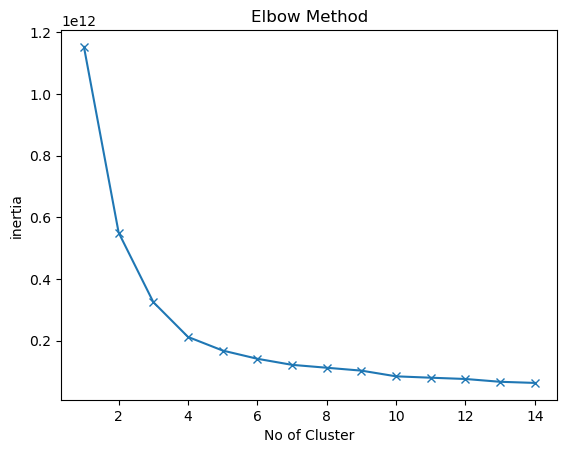

In [51]:
wcss=[]
for i in range(1,15):
    km=KMeans(n_clusters=i,random_state=42)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,15),wcss,marker='x')
plt.title("Elbow Method")
plt.xlabel('No of Cluster')
plt.ylabel("inertia")
plt.show()

##### Elbow method is some how showing the value of k is 4. But we have to choose 3 here, because of the problem statement.

#### Let's train our KMeans algorithm for the cluster of 3

In [52]:
km = KMeans(n_clusters=3, init='k-means++', random_state = 42)

In [53]:
y_kmeans = km.fit_predict(df_scaled)

#### Plotting Rape vs Total_crime_women for different clusters

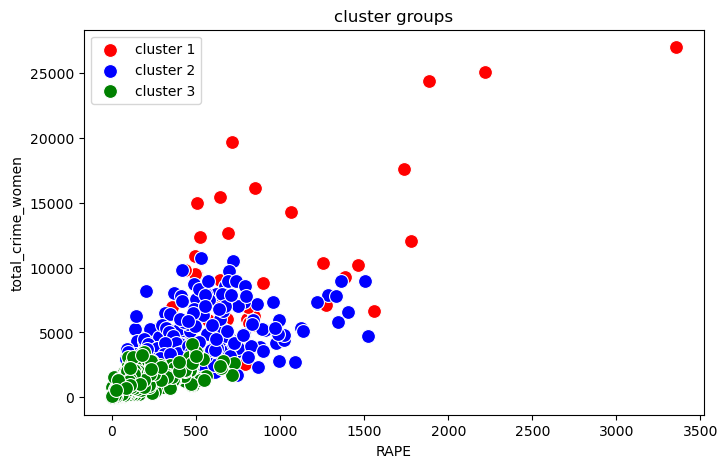

In [54]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=x[y_kmeans == 0]["RAPE"],y=x[y_kmeans == 0]['Total_crime_women'],data=x,s=100,c='red', label='cluster 1',palette='bright')
sns.scatterplot(x=x[y_kmeans == 1]["RAPE"],y=x[y_kmeans == 1]['Total_crime_women'],data=x,s=100,c='blue', label='cluster 2',palette='bright')
sns.scatterplot(x=x[y_kmeans == 2]["RAPE"],y=x[y_kmeans == 2]['Total_crime_women'],data=x,s=100,c='green', label='cluster 3',palette='bright')
plt.title('cluster groups')
plt.ylabel('total_crime_women')
plt.xlabel('RAPE')
plt.show()

#### Plotting MURDER vs TOTAL IPC CRIMES for different clusters

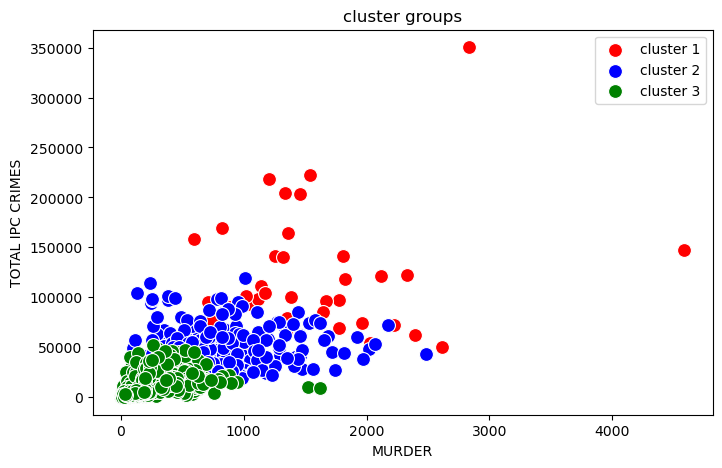

In [55]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=x[y_kmeans == 0]["MURDER"],y=x[y_kmeans == 0]['TOTAL IPC CRIMES'],data=x,s=100,c='red', label='cluster 1',palette='bright')
sns.scatterplot(x=x[y_kmeans == 1]["MURDER"],y=x[y_kmeans == 1]['TOTAL IPC CRIMES'],data=x,s=100,c='blue', label='cluster 2',palette='bright')
sns.scatterplot(x=x[y_kmeans == 2]["MURDER"],y=x[y_kmeans == 2]['TOTAL IPC CRIMES'],data=x,s=100,c='green', label='cluster 3',palette='bright')
plt.title('cluster groups')
plt.ylabel('TOTAL IPC CRIMES')
plt.xlabel('MURDER')
plt.show()

##### From the above plots whether its [murder vs total ipc crimes] or [rape vs total_crime_women] we can clearly see that red dots which is our cluster 1 belongs to high crimes area and green dots which is our cluster 3 belongs to low crimes area and blue dots that is our cluster 2 belongs to moderate crimes area

#### By observing our clusters we can say that 

### cluster 1 is sensitive area

### cluster 2 is moderate area

### cluster 3 is peaceful area

# 4.2  Create DataFrame for each cluster that shows data according to the areas.

## Sensitive Areas

In [56]:
sensitive_area = grouped[y_kmeans == 0]

In [57]:
sensitive_area

STATE/UT           DISTRICT  MURDER  ATTEMPT TO MURDER  \
10   ANDHRA PRADESH          CYBERABAD    1810                914   
11   ANDHRA PRADESH      EAST GODAVARI    1041               1211   
13   ANDHRA PRADESH             GUNTUR    1775               1326   
15   ANDHRA PRADESH     HYDERABAD CITY    1455               1563   
16   ANDHRA PRADESH         KARIMNAGAR    1674               1199   
39   ANDHRA PRADESH      WEST GODAVARI     887               1234   
72            ASSAM      GUWAHATI CITY     698                468   
83            ASSAM             NAGAON     996                629   
116           BIHAR        MUZAFFARPUR    1779               1049   
121           BIHAR              PATNA    4586               2845   
158    CHHATTISGARH             RAIPUR    1113                880   
169           DELHI               EAST     570                565   
182           DELHI              SOUTH     713                576   
188           DELHI               WEST     739                577   
191         GUJARAT   AHMEDABAD COMMR.    1204                778   
322       JHARKHAND             RANCHI    2618               1282   
327       KARNATAKA   BANGALORE COMMR.    2831               4067   
395  MADHYA PRADESH             BHOPAL     821               1099   
406  MADHYA PRADESH            GWALIOR    1143               1744   
409  MADHYA PRADESH             INDORE    1339               1810   
459     MAHARASHTRA             MUMBAI    1254                712   
460     MAHARASHTRA      MUMBAI COMMR.    1542               1063   
462     MAHARASHTRA      NAGPUR COMMR.    1175                756   
472     MAHARASHTRA        PUNE COMMR.    1317               1123   
482     MAHARASHTRA       THANE COMMR.    1384                879   
600       RAJASTHAN              ALWAR    1019                975   
654      TAMIL NADU            CHENNAI    1365               2710   
704   UTTAR PRADESH               AGRA    1609               1816   
705   UTTAR PRADESH            ALIGARH    2032               2270   
734   UTTAR PRADESH          GHAZIABAD    2227               2321   
747   UTTAR PRADESH       KANPUR NAGAR    1961               1490   
753   UTTAR PRADESH            LUCKNOW    1828               1576   
759   UTTAR PRADESH             MEERUT    2398               2351   
794     WEST BENGAL  24 PARGANAS NORTH    2329               1262   
795     WEST BENGAL  24 PARGANAS SOUTH    2114                201   
809     WEST BENGAL         JALPAIGURI    1345                798   
812     WEST BENGAL            KOLKATA     596               1159   
815     WEST BENGAL        MURSHIDABAD    1644               2657   
816     WEST BENGAL              NADIA    1355               1869   

     CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
10                                          96   641               0   
11                                          45   499               0   
13                                          18   526               0   
15                                          65   712               0   
16                                          98   853               0   
39                                          32  1062               0   
72                                         173   682               0   
83                                          46  1464               3   
116                                        187   788               0   
121                                        301   572               0   
158                                         38  1560               0   
169                                         90   643               0   
182                                         88   839               0   
188                                        139   804               0   
191                                        101   506               0   
322                                        130   791               5   
327                       

##### So for the sensitive area we have total 39 rows and 36 columns

## Moderate Areas

In [58]:
moderate_area = grouped[y_kmeans == 1]

In [59]:
moderate_area

STATE/UT          DISTRICT  MURDER  ATTEMPT TO MURDER  \
6    ANDHRA PRADESH          ADILABAD    1186                869   
7    ANDHRA PRADESH         ANANTAPUR    1922               1248   
8    ANDHRA PRADESH          CHITTOOR    1270                739   
9    ANDHRA PRADESH          CUDDAPAH    1196                506   
17   ANDHRA PRADESH           KHAMMAM    1337                791   
..              ...               ...     ...                ...   
806     WEST BENGAL            HOWRAH     666                144   
813     WEST BENGAL             MALDA     885               1189   
817     WEST BENGAL  PASCHIM MIDNAPUR    1350                706   
818     WEST BENGAL    PURAB MIDNAPUR     707                166   
823     WEST BENGAL    UTTAR DINAJPUR     638               1062   

     CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
6                                          151   672               0   
7                                           51   266               0   
8                                           32   368               0   
9                                           38   298               0   
17                                          47   721               0   
..                                         ...   ...             ...   
806                                        171   419               0   
813                                        313  1331               0   
817                                        382   705               0   
818                                        208   555               0   
823                                        158   833               0   

     OTHER RAPE  KIDNAPPING & ABDUCTION  \
6           672                     754   
7           266                     839   
8           368                     907   
9           298                     653   
17          721                     919   
..          ...                     ...   
806         419                     913   
813        1331                    1323   
817         705                     806   
818         555                    1042   
823         833                    1059   

     KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  ...  \
6                                            570  ...   
7                                            554  ...   
8                                            531  ...   
9                                            522  ...   
17                                           717  ...   
..                                           ...  ...   
806                                          775  ...   
813                                          949  ...   
817                                          805  ...   
818                                          969  ...   
823                                          867  ...   

     INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
6                          1242                                 4126   
7                           622                                 1645   
8                          2179                                 3283   
9                           538                                 1790   
17                         2525                                 4090   
..                          ...                                  ...   
806                          61                                 5265   
813                          19                                 4221   
817                          10                                 5355   
818                           3                                 4857   
823                           9                                 3095   

     IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
6                                              0                         3593   
7                                              0                         5058   
8                  

##### So for the moderate area we have total 292 rows and 36 columns

## Peaceful Areas

In [60]:
peaceful_area = grouped[y_kmeans == 2]

In [61]:
peaceful_area

STATE/UT         DISTRICT  MURDER  ATTEMPT TO MURDER  \
0    A & N ISLANDS  A and N ISLANDS      15                 19   
1    A & N ISLANDS          ANDAMAN     118                 41   
2    A & N ISLANDS              CAR       2                  0   
3    A & N ISLANDS          NICOBAR      12                  2   
4    A & N ISLANDS            NORTH       5                  0   
..             ...              ...     ...                ...   
814    WEST BENGAL         MIDNAPUR     120                 20   
819    WEST BENGAL          PURULIA     733                 12   
820    WEST BENGAL   SEALDAH G.R.P.     188                 58   
821    WEST BENGAL  SILIGURI G.R.P.      42                  3   
822    WEST BENGAL      SILIGURI_PC      32                  6   

     CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                            1     3               0   
1                                           18    92               0   
2                                            0     0               0   
3                                            2     2               0   
4                                            0     4               0   
..                                         ...   ...             ...   
814                                         44    84               0   
819                                         85   497               0   
820                                         21    19               0   
821                                          6     2               0   
822                                          6    21               0   

     OTHER RAPE  KIDNAPPING & ABDUCTION  \
0             3                      12   
1            92                      73   
2             0                       1   
3             2                       1   
4             4                       0   
..          ...                     ...   
814          84                      74   
819         497                     276   
820          19                      67   
821           2                      31   
822          21                     123   

     KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  ...  \
0                                              9  ...   
1                                             61  ...   
2                                              1  ...   
3                                              0  ...   
4                                              0  ...   
..                                           ...  ...   
814                                           74  ...   
819                                          198  ...   
820                                           36  ...   
821                                           23  ...   
822                                          111  ...   

     INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                             2                                   18   
1                            37                                   97   
2                             0                                    0   
3                             0                                    1   
4                             1                                    2   
..                          ...                                  ...   
814                           1                                  470   
819                           0                                 1778   
820                           2                                   10   
821                           1                                    1   
822                          12                                  370   

     IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                              0                            4   
1                                              0                           32   
2                                         

##### 493 rows × 36 columns are belongs to peaceful area

# 4.3 -- ("Analyse your clusters and prepare a report that explains all your observations)

#### Let's find Top 10 sensitive areas with their corresponding districts and states

In [62]:
sensitive_area

STATE/UT           DISTRICT  MURDER  ATTEMPT TO MURDER  \
10   ANDHRA PRADESH          CYBERABAD    1810                914   
11   ANDHRA PRADESH      EAST GODAVARI    1041               1211   
13   ANDHRA PRADESH             GUNTUR    1775               1326   
15   ANDHRA PRADESH     HYDERABAD CITY    1455               1563   
16   ANDHRA PRADESH         KARIMNAGAR    1674               1199   
39   ANDHRA PRADESH      WEST GODAVARI     887               1234   
72            ASSAM      GUWAHATI CITY     698                468   
83            ASSAM             NAGAON     996                629   
116           BIHAR        MUZAFFARPUR    1779               1049   
121           BIHAR              PATNA    4586               2845   
158    CHHATTISGARH             RAIPUR    1113                880   
169           DELHI               EAST     570                565   
182           DELHI              SOUTH     713                576   
188           DELHI               WEST     739                577   
191         GUJARAT   AHMEDABAD COMMR.    1204                778   
322       JHARKHAND             RANCHI    2618               1282   
327       KARNATAKA   BANGALORE COMMR.    2831               4067   
395  MADHYA PRADESH             BHOPAL     821               1099   
406  MADHYA PRADESH            GWALIOR    1143               1744   
409  MADHYA PRADESH             INDORE    1339               1810   
459     MAHARASHTRA             MUMBAI    1254                712   
460     MAHARASHTRA      MUMBAI COMMR.    1542               1063   
462     MAHARASHTRA      NAGPUR COMMR.    1175                756   
472     MAHARASHTRA        PUNE COMMR.    1317               1123   
482     MAHARASHTRA       THANE COMMR.    1384                879   
600       RAJASTHAN              ALWAR    1019                975   
654      TAMIL NADU            CHENNAI    1365               2710   
704   UTTAR PRADESH               AGRA    1609               1816   
705   UTTAR PRADESH            ALIGARH    2032               2270   
734   UTTAR PRADESH          GHAZIABAD    2227               2321   
747   UTTAR PRADESH       KANPUR NAGAR    1961               1490   
753   UTTAR PRADESH            LUCKNOW    1828               1576   
759   UTTAR PRADESH             MEERUT    2398               2351   
794     WEST BENGAL  24 PARGANAS NORTH    2329               1262   
795     WEST BENGAL  24 PARGANAS SOUTH    2114                201   
809     WEST BENGAL         JALPAIGURI    1345                798   
812     WEST BENGAL            KOLKATA     596               1159   
815     WEST BENGAL        MURSHIDABAD    1644               2657   
816     WEST BENGAL              NADIA    1355               1869   

     CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
10                                          96   641               0   
11                                          45   499               0   
13                                          18   526               0   
15                                          65   712               0   
16                                          98   853               0   
39                                          32  1062               0   
72                                         173   682               0   
83                                          46  1464               3   
116                                        187   788               0   
121                                        301   572               0   
158                                         38  1560               0   
169                                         90   643               0   
182                                         88   839               0   
188                                        139   804               0   
191                                        101   506               0   
322                                        130   791               5   
327                       

####  Adding a new column 'Total crimes' to the DataFrame sensitive_area. This new column is the sum of all columns from the 3rd column onwards (index 2) for each row.

In [63]:
sensitive_area['Total crimes']= sensitive_area.iloc[:,2:].sum(axis=1)

In [64]:
sensitive_area.head(3)

STATE/UT       DISTRICT  MURDER  ATTEMPT TO MURDER  \
10  ANDHRA PRADESH      CYBERABAD    1810                914   
11  ANDHRA PRADESH  EAST GODAVARI    1041               1211   
13  ANDHRA PRADESH         GUNTUR    1775               1326   

    CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
10                                         96   641               0   
11                                         45   499               0   
13                                         18   526               0   

    OTHER RAPE  KIDNAPPING & ABDUCTION  \
10         641                    1398   
11         499                     780   
13         526                     969   

    KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  ...  \
10                                          857  ...   
11                                          378  ...   
13                                          705  ...   

    CRUELTY BY HUSBAND OR HIS RELATIVES  \
10                                 8932   
11                                 4927   
13                                 5792   

    IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
10                                            4                        10314   
11                                            0                         6655   
13                                            0                         6110   

    OTHER IPC CRIMES  TOTAL IPC CRIMES  Total_crime_sc  Total_crime_st  \
10             23701            141743            1657             341   
11             18113             93193            2042             223   
13             28932             97091            1831             354   

    Total_crime_children  Total_crime_women  Total crimes  
10                   296              15411        332895  
11                   213               9514        213190  
13                   709              12390        224126  

[3 rows x 37 columns]

In [65]:
sensitive_area.sort_values(by='Total crimes',ascending=False,inplace=True)

In [66]:
sensitive_areas = sensitive_area.reset_index(drop=True).head(10)

In [67]:
sensitive_areas

STATE/UT          DISTRICT  MURDER  ATTEMPT TO MURDER  \
0       KARNATAKA  BANGALORE COMMR.    2831               4067   
1     MAHARASHTRA     MUMBAI COMMR.    1542               1063   
2         GUJARAT  AHMEDABAD COMMR.    1204                778   
3  ANDHRA PRADESH    HYDERABAD CITY    1455               1563   
4  MADHYA PRADESH            INDORE    1339               1810   
5  MADHYA PRADESH            BHOPAL     821               1099   
6     WEST BENGAL           KOLKATA     596               1159   
7      TAMIL NADU           CHENNAI    1365               2710   
8     MAHARASHTRA            MUMBAI    1254                712   
9     MAHARASHTRA       PUNE COMMR.    1317               1123   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         54   642               1   
1                                         33  1386               0   
2                                        101   506               0   
3                                         65   712               0   
4                                         40  1255               0   
5                                         31  1272               0   
6                                        256   433               0   
7                                         33   531               1   
8                                         33   776               0   
9                                         57   846               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  \
0         641                    3014   
1        1386                    1334   
2         506                    2301   
3         712                    1466   
4        1255                     625   
5        1272                     610   
6         433                    1534   
7         530                     627   
8         776                     793   
9         846                    1087   

   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  ...  \
0                                          947  ...   
1                                          904  ...   
2                                         1669  ...   
3                                          690  ...   
4                                          460  ...   
5                                          496  ...   
6                                         1178  ...   
7                                          377  ...   
8                                          393  ...   
9                                          774  ...   

   CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                                 3832   
1                                 2736   
2                                11670   
3                                14055   
4                                 3918   
5                                 1967   
6                                 4362   
7                                 2212   
8                                 1195   
9                                 2493   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                         1182   
1                                            1                         4942   
2                                            0                         2084   
3                                            2                         5966   
4                                            5                         4657   
5                                            3                         3299   
6                                           27                         5334   
7                                            0                        10434   
8                                            0                         3487   
9                                            1                         5687   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  Total_crime_sc  Total_crime_st  \
0            124176            350347          

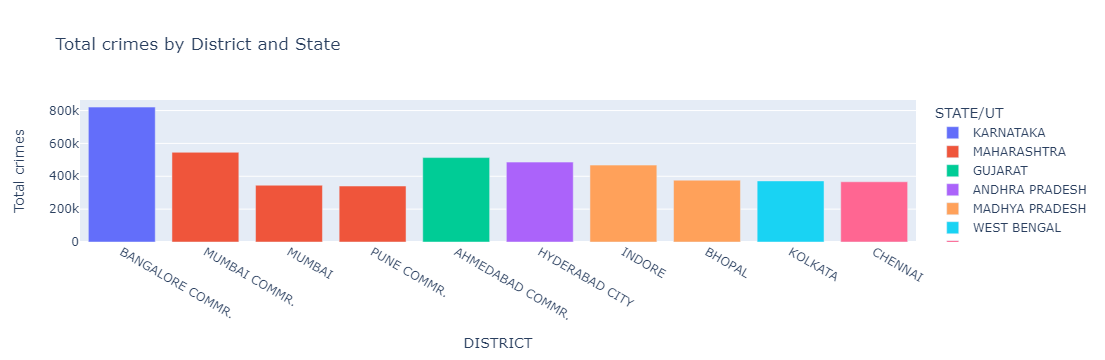

In [68]:
import plotly.express as px
fig = px.bar(sensitive_areas, x='DISTRICT', y='Total crimes', color='STATE/UT', title='Total crimes by District and State')
fig.show()

##### So from the above barplot we can clearly see that In District Bangalore commr which is situated in Karnataka has the highest crimes in India that is around 820.908k.

##### Similarly in Mumbai Commr which is in Maharashtra has the second highest crimes in India that is around 545.791k Then Ahmedabad Commr in Gujarat has total crimes around 513.719k and so on

#### Let's find top 10 peaceful areas in india with corresponding districts and states 

In [69]:
peaceful_area

STATE/UT         DISTRICT  MURDER  ATTEMPT TO MURDER  \
0    A & N ISLANDS  A and N ISLANDS      15                 19   
1    A & N ISLANDS          ANDAMAN     118                 41   
2    A & N ISLANDS              CAR       2                  0   
3    A & N ISLANDS          NICOBAR      12                  2   
4    A & N ISLANDS            NORTH       5                  0   
..             ...              ...     ...                ...   
814    WEST BENGAL         MIDNAPUR     120                 20   
819    WEST BENGAL          PURULIA     733                 12   
820    WEST BENGAL   SEALDAH G.R.P.     188                 58   
821    WEST BENGAL  SILIGURI G.R.P.      42                  3   
822    WEST BENGAL      SILIGURI_PC      32                  6   

     CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                            1     3               0   
1                                           18    92               0   
2                                            0     0               0   
3                                            2     2               0   
4                                            0     4               0   
..                                         ...   ...             ...   
814                                         44    84               0   
819                                         85   497               0   
820                                         21    19               0   
821                                          6     2               0   
822                                          6    21               0   

     OTHER RAPE  KIDNAPPING & ABDUCTION  \
0             3                      12   
1            92                      73   
2             0                       1   
3             2                       1   
4             4                       0   
..          ...                     ...   
814          84                      74   
819         497                     276   
820          19                      67   
821           2                      31   
822          21                     123   

     KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  ...  \
0                                              9  ...   
1                                             61  ...   
2                                              1  ...   
3                                              0  ...   
4                                              0  ...   
..                                           ...  ...   
814                                           74  ...   
819                                          198  ...   
820                                           36  ...   
821                                           23  ...   
822                                          111  ...   

     INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                             2                                   18   
1                            37                                   97   
2                             0                                    0   
3                             0                                    1   
4                             1                                    2   
..                          ...                                  ...   
814                           1                                  470   
819                           0                                 1778   
820                           2                                   10   
821                           1                                    1   
822                          12                                  370   

     IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                              0                            4   
1                                              0                           32   
2                                         

#### Adding a new column 'Total crimes' to the DataFrame peaceful_area. This new column is the sum of all columns from the 3rd column onwards (index 2) for each row.

In [70]:
peaceful_area['Total crimes']= peaceful_area.iloc[:,2:].sum(axis=1)

In [71]:
peaceful_area.head(3)

STATE/UT         DISTRICT  MURDER  ATTEMPT TO MURDER  \
0  A & N ISLANDS  A and N ISLANDS      15                 19   
1  A & N ISLANDS          ANDAMAN     118                 41   
2  A & N ISLANDS              CAR       2                  0   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                          1     3               0   
1                                         18    92               0   
2                                          0     0               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  \
0           3                      12   
1          92                      73   
2           0                       1   

   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  ...  \
0                                            9  ...   
1                                           61  ...   
2                                            1  ...   

   CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                                   18   
1                                   97   
2                                    0   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                            4   
1                                            0                           32   
2                                            0                            1   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  Total_crime_sc  Total_crime_st  \
0               337               807               0               1   
1              3638              7377               0              33   
2                 8                24               0               0   

   Total_crime_children  Total_crime_women  Total crimes  
0                    10                 54          1806  
1                   206                458         16534  
2                     2                  2            57  

[3 rows x 37 columns]

In [72]:
peaceful_area.sort_values(by='Total crimes',ascending=True,inplace=True)

In [73]:
peaceful_areas = peaceful_area.reset_index(drop=True).head(10)

In [74]:
peaceful_areas

STATE/UT        DISTRICT  MURDER  ATTEMPT TO MURDER  \
0             DELHI          S.T.F.       0                  0   
1   JAMMU & KASHMIR  RAILWAYS KATRA       0                  0   
2           TRIPURA          G.R.P.       0                  0   
3           MANIPUR             CID       0                  0   
4   JAMMU & KASHMIR    RAILWAYS KMR       0                  0   
5  HIMACHAL PRADESH             CID       0                  0   
6             ASSAM            BIEO       0                  0   
7           TRIPURA             GRP       2                  0   
8     A & N ISLANDS             CAR       2                  0   
9   JAMMU & KASHMIR  RAILWAYS JAMMU       0                  3   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                          0     0               0   
1                                          0     0               0   
2                                          0     0               0   
3                                          0     0               0   
4                                          0     0               0   
5                                          0     0               0   
6                                          0     0               0   
7                                          0     0               0   
8                                          0     0               0   
9                                          0     0               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  \
0           0                       0   
1           0                       0   
2           0                       0   
3           0                       0   
4           0                       0   
5           0                       0   
6           0                       0   
7           0                       0   
8           0                       1   
9           0                       0   

   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  ...  \
0                                            0  ...   
1                                            0  ...   
2                                            0  ...   
3                                            0  ...   
4                                            0  ...   
5                                            0  ...   
6                                            0  ...   
7                                            0  ...   
8                                            1  ...   
9                                            0  ...   

   CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   
5                                    0   
6                                    0   
7                                    0   
8                                    0   
9                                    0   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                            0   
1                                            0                            0   
2                                            0                            0   
3                                            0                            0   
4                                            0                            0   
5                                            0                            0   
6                                            0                            0   
7                                            0                            0   
8                                            0                            1   
9                                            0                            2   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  Total_crime_sc  Total_crime_st  \
0                 0                 0            

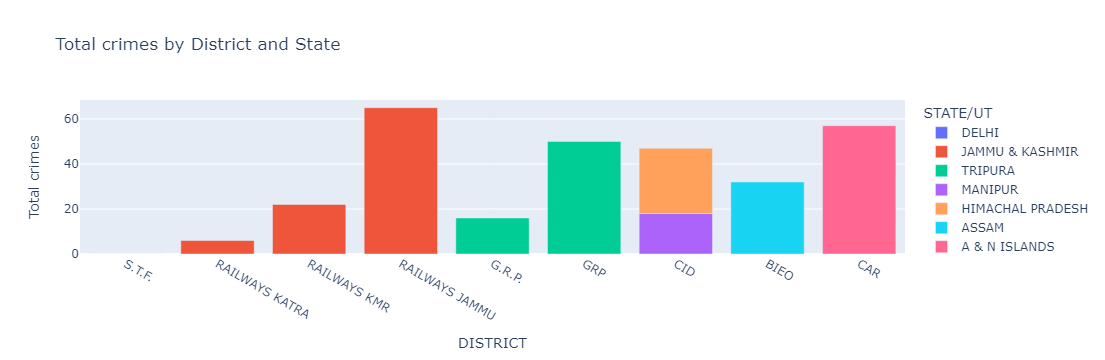

In [75]:
fig = px.bar(peaceful_areas, x='DISTRICT', y='Total crimes', color='STATE/UT', title='Total crimes by District and State')
fig.show()

##### So from the above barplot we can clearly see that district S.T.F which comes under Delhi has the lowest crimes in India which is 0.

##### Then Ralways Katra in Jammu Kashmir with total crimes around 6 Then G.R.P in Tripura has total crimes around 16.

##### So from the above observartions we can say that (Delhi-S.T.F) then (Jammu Kashmir-Railways Katra) and then (Tripura-G.R.P) has the safest areas in India

### Let's check the correlation heatmap for the sensitive areas this will tell us how the type of crimes are related or how much it impacted to Total crimes

In [76]:
numerical_cols = sensitive_area.select_dtypes(include=['int64', 'float64'])
cor = numerical_cols.corr()

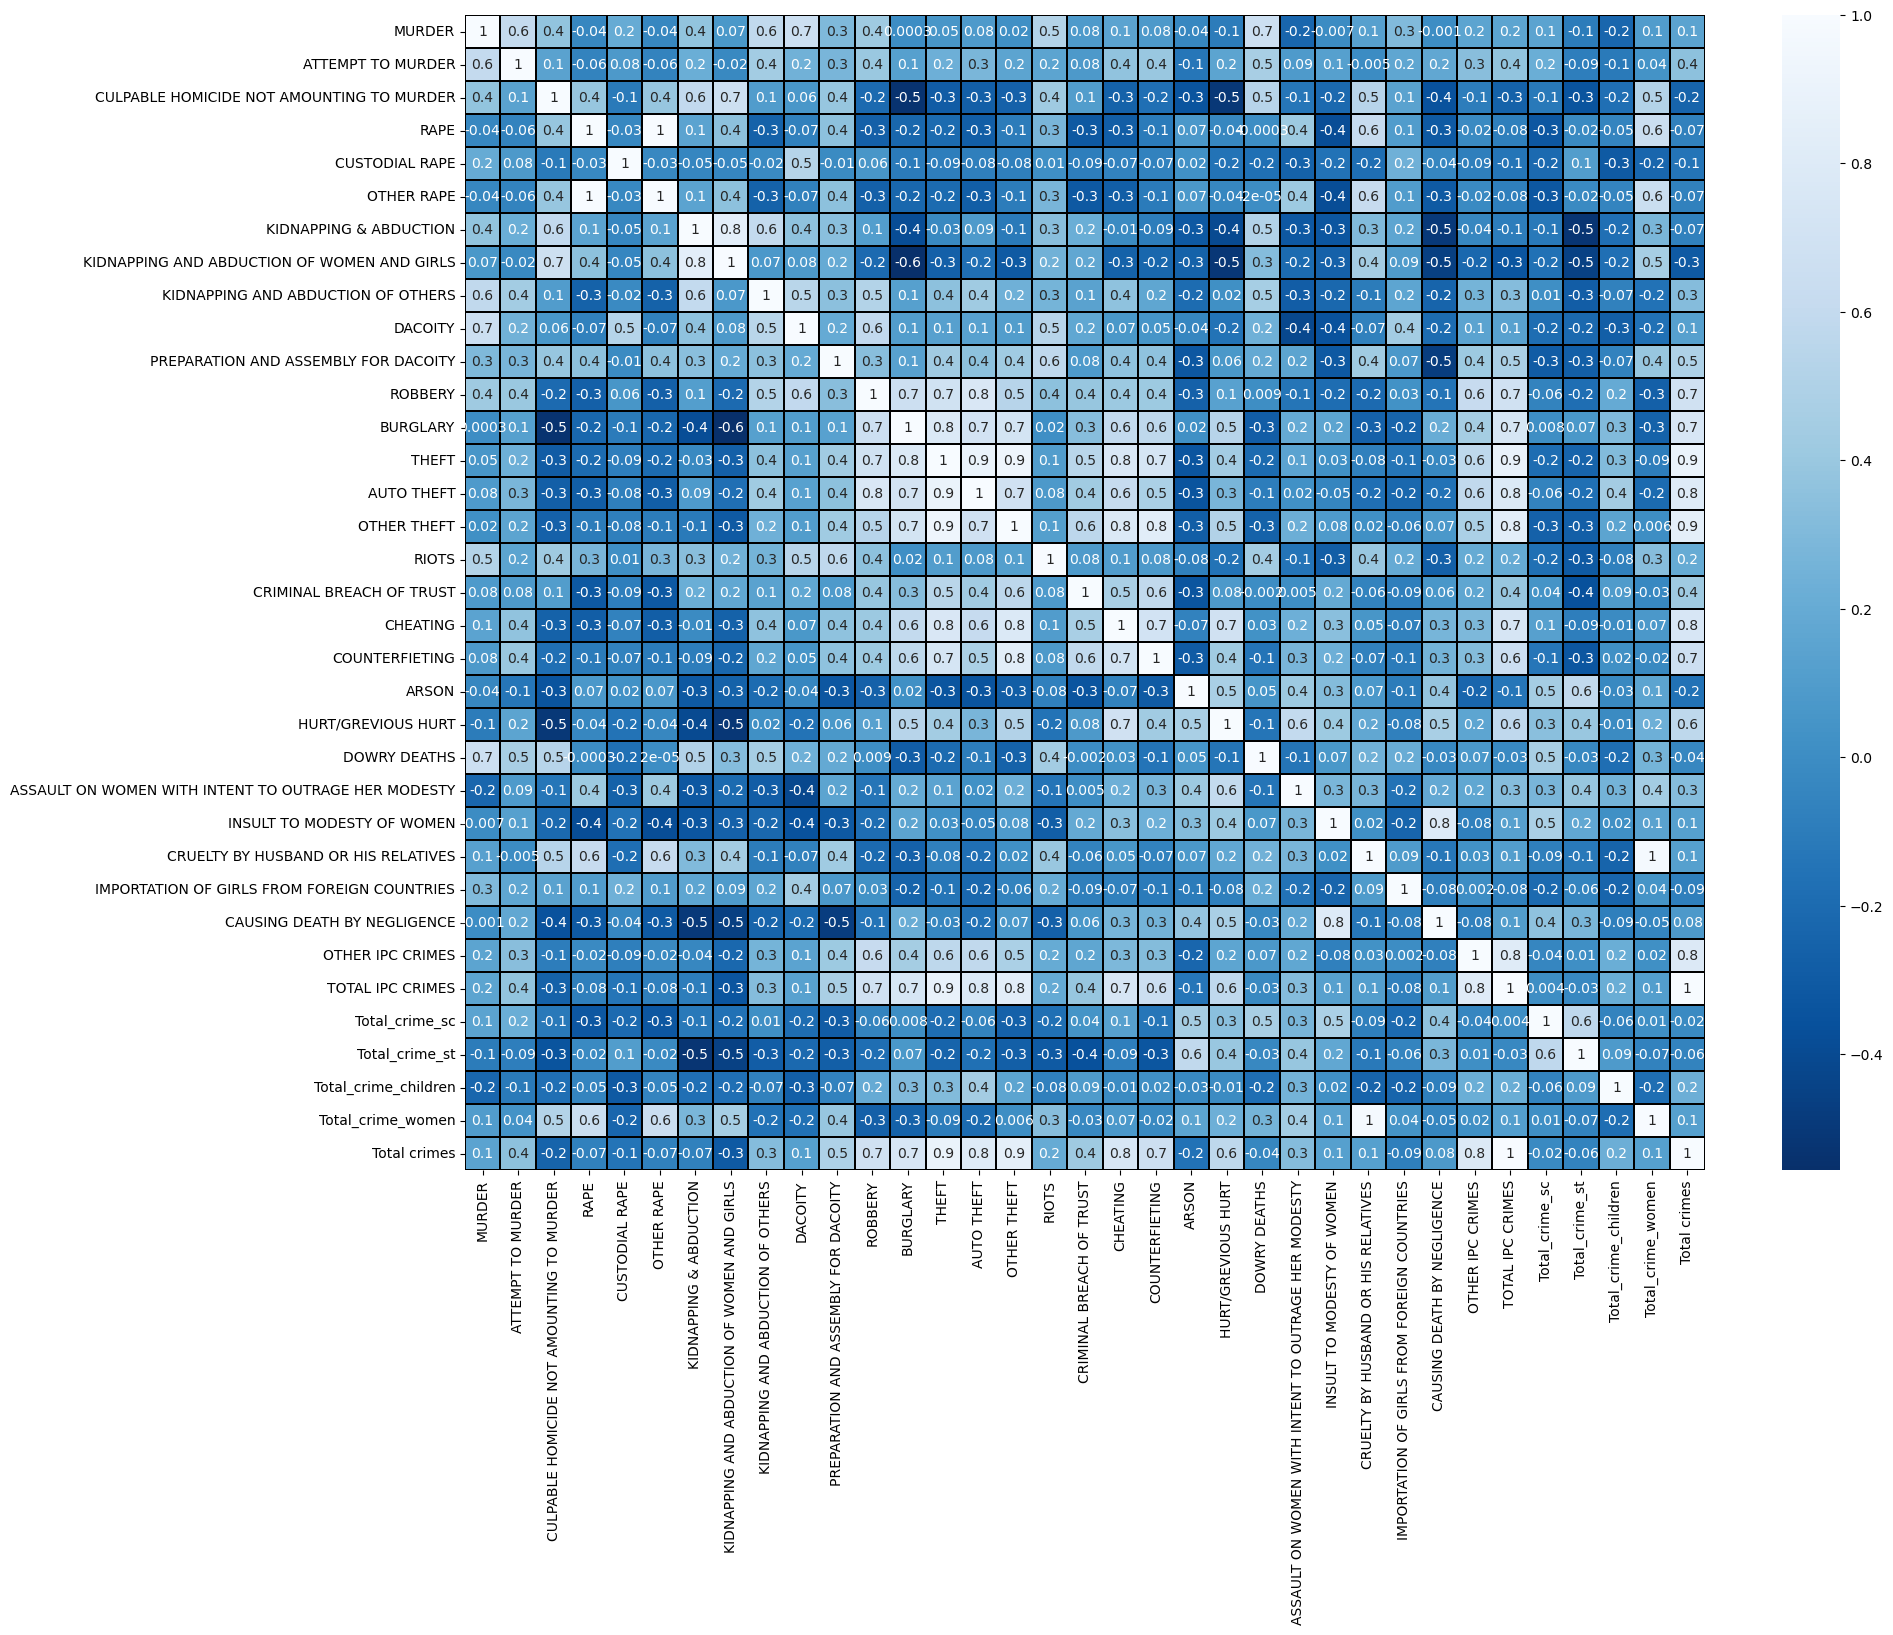

In [77]:
# visualization of correlation by heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(cor,linewidths = .1,fmt='.1g',linecolor = 'black',annot = True,cmap = 'Blues_r')
plt.yticks(rotation =0)
plt.show()

In [78]:
cor['Total crimes'].sort_values(ascending=False)

Total crimes                                           1.000000
TOTAL IPC CRIMES                                       0.997685
THEFT                                                  0.901880
OTHER THEFT                                            0.852217
AUTO THEFT                                             0.800613
OTHER IPC CRIMES                                       0.785569
CHEATING                                               0.750670
BURGLARY                                               0.745500
ROBBERY                                                0.685166
COUNTERFIETING                                         0.663981
HURT/GREVIOUS HURT                                     0.573062
PREPARATION AND ASSEMBLY FOR DACOITY                   0.490345
CRIMINAL BREACH OF TRUST                               0.417897
ATTEMPT TO MURDER                                      0.354527
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY    0.323481
KIDNAPPING AND ABDUCTION OF OTHERS      

##### A correlation coefficient close to 1 or -1 indicates a strong positive or negative relationship, respectively, while a coefficient close to 0 indicates a weak or no relationship.

##### Here are some observations based on the values:

##### 'TOTAL IPC CRIMES', 'THEFT', 'OTHER THEFT', 'AUTO THEFT', and 'OTHER IPC CRIMES','CHEATING','BURGLARY','ROBBERY','COUNTERFIETING','HURT/GREVIOUS HURT' have strong positive correlations with 'Total crimes'. This suggests that these crimes tend to increase or decrease along with the total number of crimes.

##### 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS' has a negative correlation with 'Total crimes'.

##### 'Total_crime_sc', 'DOWRY DEATHS', 'Total_crime_st', 'OTHER RAPE', 'RAPE', 'KIDNAPPING & ABDUCTION', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES', 'CUSTODIAL RAPE', 'ARSON', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', and 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS' all have negative correlations with 'Total crimes', but these correlations are weaker.

In [79]:
sensitive_area['STATE/UT'].value_counts()

STATE/UT
ANDHRA PRADESH    6
WEST BENGAL       6
UTTAR PRADESH     6
MAHARASHTRA       5
MADHYA PRADESH    3
DELHI             3
BIHAR             2
ASSAM             2
KARNATAKA         1
GUJARAT           1
TAMIL NADU        1
RAJASTHAN         1
CHHATTISGARH      1
JHARKHAND         1
Name: count, dtype: int64

##### Here we can see that Andhra Pradesh, West Bengal and Uttar Pradesh are comes 6 times and Maharashtra comes 5 times.

In [80]:
sensitive_area.groupby(['DISTRICT'])['MURDER'].sum().sort_values(ascending=False).head(10)

DISTRICT
PATNA                4586
BANGALORE COMMR.     2831
RANCHI               2618
MEERUT               2398
24 PARGANAS NORTH    2329
GHAZIABAD            2227
24 PARGANAS SOUTH    2114
ALIGARH              2032
KANPUR NAGAR         1961
LUCKNOW              1828
Name: MURDER, dtype: int64

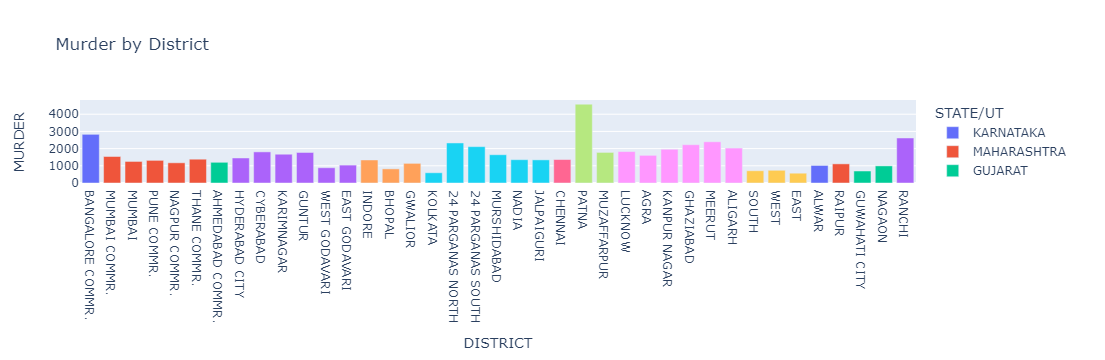

In [89]:
fig = px.bar(sensitive_area, x='DISTRICT', y='MURDER', color='STATE/UT', title='Murder by District')
fig.show()

##### From the above barplot we see that Patna has the Murder of 4586 that is the highest. Then BANGALORE COMMR. has Murder of 2831 then RANCHI of 2618 and so on

In [81]:
sensitive_area.groupby(['DISTRICT'])['RAPE'].sum().sort_values(ascending=False).head(10)

DISTRICT
MURSHIDABAD          3352
24 PARGANAS SOUTH    2221
24 PARGANAS NORTH    1883
JALPAIGURI           1777
NADIA                1734
RAIPUR               1560
NAGAON               1464
MUMBAI COMMR.        1386
BHOPAL               1272
INDORE               1255
Name: RAPE, dtype: int64

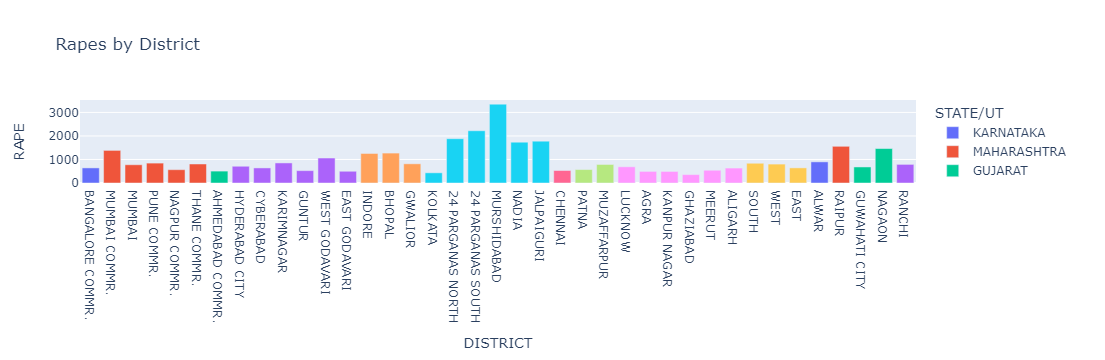

In [90]:
fig = px.bar(sensitive_area, x='DISTRICT', y='RAPE', color='STATE/UT', title='Rapes by District')
fig.show()

##### Maximum Rape Happend in West Bengal because top five district MURSHIDABAD(3352),24 PARGANAS SOUTH(2221),24 PARGANAS NORTH(1883),JALPAIGURI(1777),NADIA(1734) comes under West Bengal

In [82]:
sensitive_area.groupby(['DISTRICT'])['RIOTS'].sum().sort_values(ascending=False).head(10)

DISTRICT
24 PARGANAS SOUTH    8893
PUNE COMMR.          6489
PATNA                5948
24 PARGANAS NORTH    5484
MUZAFFARPUR          5098
BANGALORE COMMR.     4665
THANE COMMR.         3390
AGRA                 3279
NAGAON               3192
MURSHIDABAD          3143
Name: RIOTS, dtype: int64

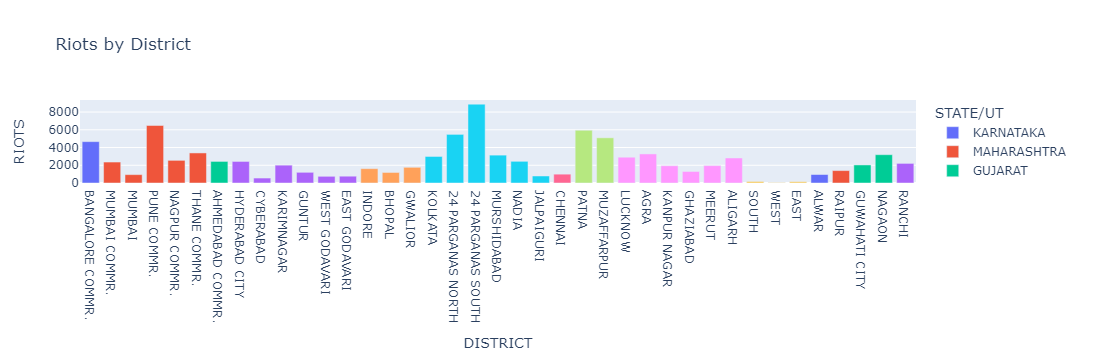

In [91]:
fig = px.bar(sensitive_area, x='DISTRICT', y='RIOTS', color='STATE/UT', title='Riots by District')
fig.show()

##### Maximum RIOTS happend in 24 parganas south in West bengal then pune commr then Patna then 24 parganas north

In [83]:
sensitive_area.groupby(['DISTRICT'])['Total_crime_women'].sum().sort_values(ascending=False).head(10)

DISTRICT
MURSHIDABAD          27004
24 PARGANAS SOUTH    25115
24 PARGANAS NORTH    24376
HYDERABAD CITY       19685
NADIA                17582
KARIMNAGAR           16110
CYBERABAD            15411
AHMEDABAD COMMR.     14973
WEST GODAVARI        14299
LUCKNOW              12679
Name: Total_crime_women, dtype: int64

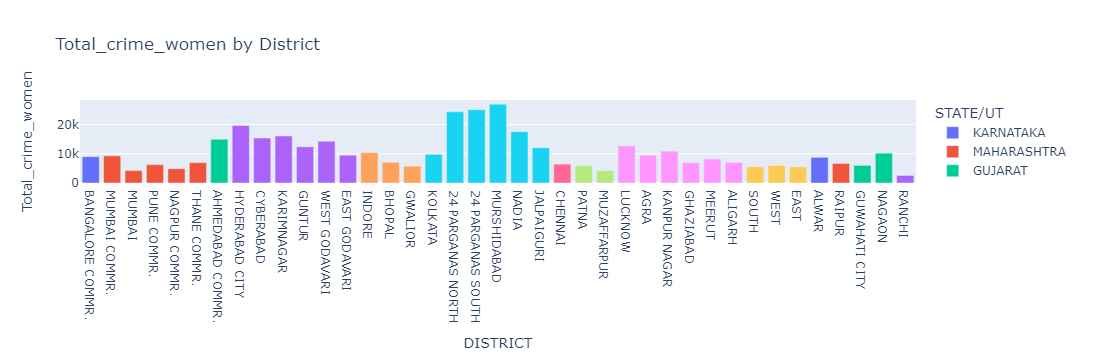

In [92]:
fig = px.bar(sensitive_area, x='DISTRICT', y='Total_crime_women', color='STATE/UT', title='Total_crime_women by District')
fig.show()

##### Maximum crime against women happend in West Bengal. Murshidabad(27004),24 parganas(north and south) has the highest

In [84]:
sensitive_area.groupby(['DISTRICT'])['Total_crime_sc'].sum().sort_values(ascending=False).head(10)

DISTRICT
KARIMNAGAR       3331
ALWAR            3272
WEST GODAVARI    2738
KANPUR NAGAR     2654
LUCKNOW          2482
GWALIOR          2310
EAST GODAVARI    2042
AGRA             1943
GUNTUR           1831
ALIGARH          1801
Name: Total_crime_sc, dtype: int64

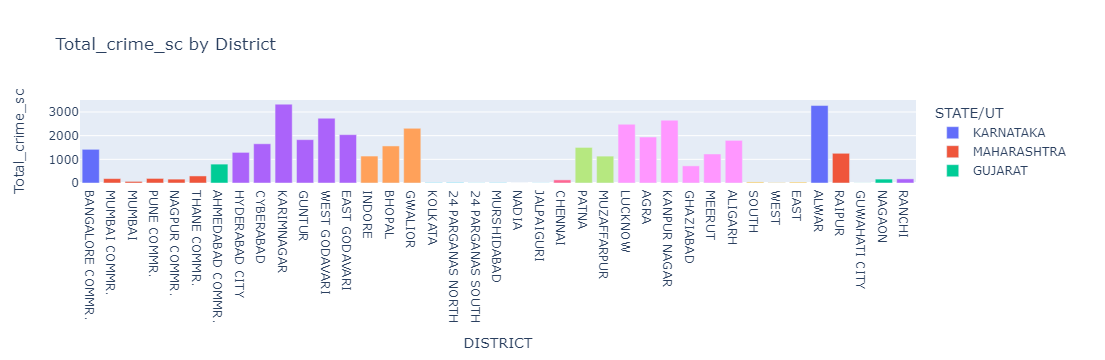

In [93]:
fig = px.bar(sensitive_area, x='DISTRICT', y='Total_crime_sc', color='STATE/UT', title='Total_crime_sc by District')
fig.show()

##### Maximum crime against sc happend in Karimnagar(3331) in andhra Pradesh Then Alwar(3272) in Rajasthan then West Godavari(2738) in Andhra Pradesh

In [85]:
sensitive_area.groupby(['DISTRICT'])['Total_crime_st'].sum().sort_values(ascending=False).head(10)

DISTRICT
ALWAR            621
GWALIOR          595
RAIPUR           520
KARIMNAGAR       505
INDORE           421
RANCHI           364
GUNTUR           354
CYBERABAD        341
BHOPAL           226
EAST GODAVARI    223
Name: Total_crime_st, dtype: int64

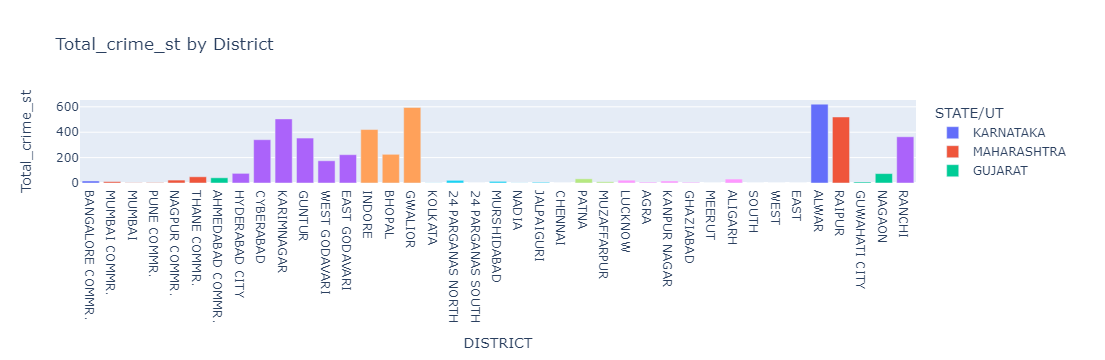

In [94]:
fig = px.bar(sensitive_area, x='DISTRICT', y='Total_crime_st', color='STATE/UT', title='Total_crime_st by District')
fig.show()

##### Maximum crime against st happend in Alwar(621) in Rajasthan then Gwalior(595) in Madhya Pradesh then Raipur(520) in Chhattisgarh

In [86]:
sensitive_area.groupby(['DISTRICT'])['Total_crime_children'].sum().sort_values(ascending=False).head(10)

DISTRICT
INDORE           4401
PUNE COMMR.      3391
WEST             2935
MUMBAI COMMR.    2865
EAST             2647
KARIMNAGAR       2406
RAIPUR           2127
SOUTH            2107
NAGPUR COMMR.    1895
KOLKATA          1730
Name: Total_crime_children, dtype: int64

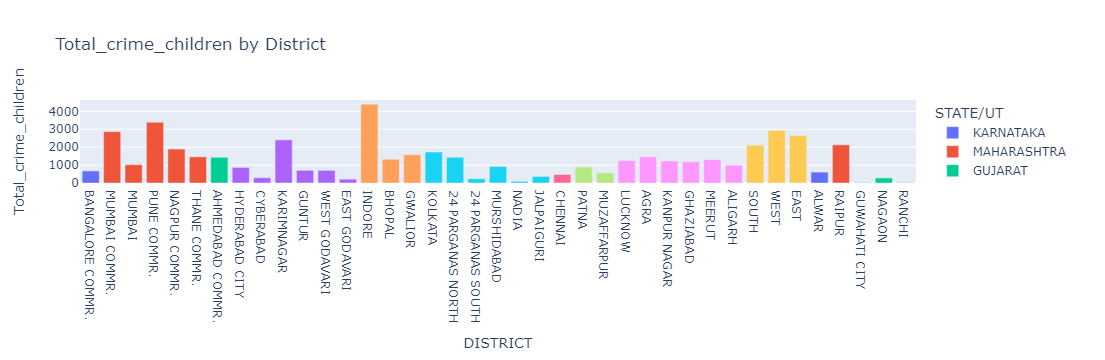

In [95]:
fig = px.bar(sensitive_area, x='DISTRICT', y='Total_crime_children', color='STATE/UT', title='Total_crime_children by District')
fig.show()

##### Maximum crime against children happend in Indore(4401) in madhya Pradesh then Pune Commr(3391) in maharashtra then West(2935) in Delhi and so on

In [98]:
sensitive_area.groupby(['DISTRICT'])['THEFT'].sum().sort_values(ascending=False).head(10)

DISTRICT
BANGALORE COMMR.    105434
MUMBAI COMMR.        85365
AHMEDABAD COMMR.     57655
HYDERABAD CITY       56167
MUMBAI               54936
PUNE COMMR.          48898
KOLKATA              41317
INDORE               40882
SOUTH                37467
CYBERABAD            29665
Name: THEFT, dtype: int64

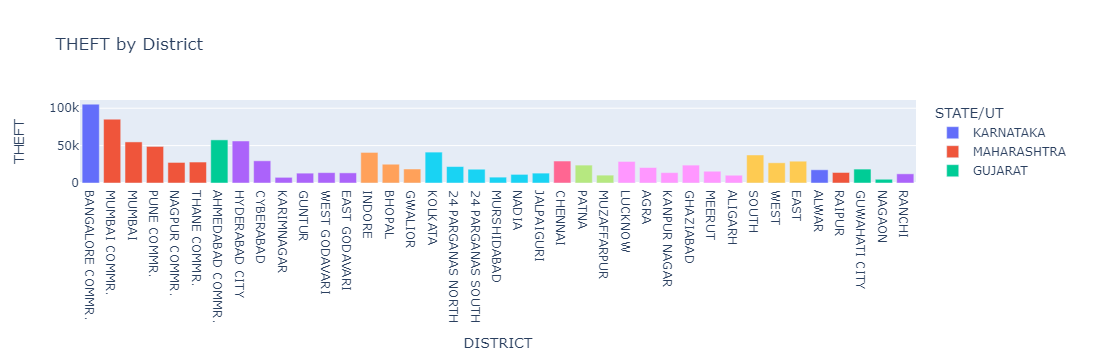

In [100]:
fig = px.bar(sensitive_area, x='DISTRICT', y='THEFT', color='STATE/UT', title='THEFT by District')
fig.show()

##### Bangalore Commr has the highest Theft in Karnataka is around 105.434k then Mumbai Commr in Maharashtra around 85.365k then Ahmedabad commr in Gujarat around 57.655k

In [96]:
sensitive_area.groupby(['DISTRICT'])['Total crimes'].sum().sort_values(ascending=False).head(10)

DISTRICT
BANGALORE COMMR.    820908
MUMBAI COMMR.       545791
AHMEDABAD COMMR.    513719
HYDERABAD CITY      486133
INDORE              467911
BHOPAL              376329
KOLKATA             371687
CHENNAI             366546
MUMBAI              345476
PUNE COMMR.         340647
Name: Total crimes, dtype: int64

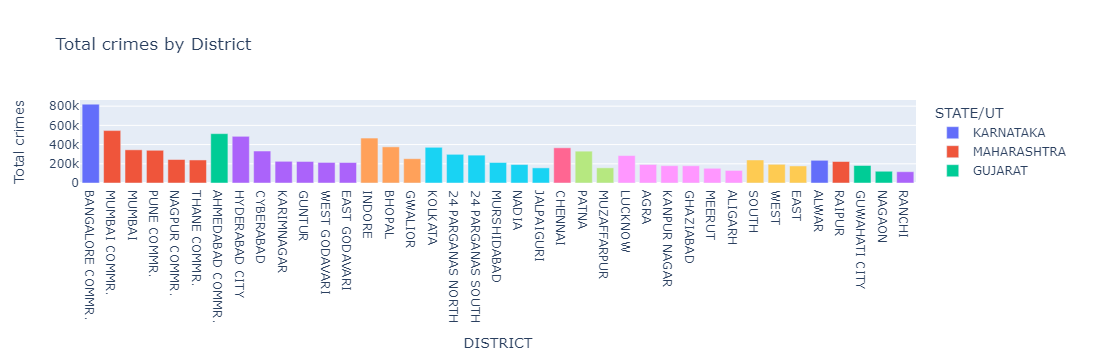

In [97]:
fig = px.bar(sensitive_area, x='DISTRICT', y='Total crimes', color='STATE/UT', title='Total crimes by District')
fig.show()

##### Maximum crimes happend in BANGALORE COMMR. then MUMBAI COMMR. then AHMEDABAD COMMR. then HYDERABAD CITY and so on
'''
BANGALORE COMMR.    (820908),
MUMBAI COMMR.       (545791),
AHMEDABAD COMMR.    (513719),
HYDERABAD CITY      (486133),
INDORE              (467911),
BHOPAL              (376329),
KOLKATA             (371687),
CHENNAI             (366546),
MUMBAI              (345476),
PUNE COMMR.         (340647)
'''

### Let's Plot a Pie plot to see that what type of crime is taking the most part in overall crime

In [111]:
murder= sensitive_area['MURDER'].sum()
rape= sensitive_area['RAPE'].sum()
riots=sensitive_area['RIOTS'].sum()
kidnap= sensitive_area['KIDNAPPING & ABDUCTION'].sum()
dacoity= sensitive_area['DACOITY'].sum()
robbery = sensitive_area['ROBBERY'].sum()
burglary= sensitive_area['BURGLARY'].sum()
theft= sensitive_area['THEFT'].sum()
crimes_against_women = sensitive_area['Total_crime_women'].sum()
crimes_against_ST = sensitive_area['Total_crime_st'].sum()
crimes_against_SC = sensitive_area['Total_crime_sc'].sum()
crimes_against_children = sensitive_area['Total_crime_children'].sum()


crime_group = ['Murder','rape','Kidnapping','Dacoity','Robbery','Burglary','Theft','Riots',
                'Crimes Against Women','Crimes Against ST','Crimes against SC','Crimes Against Children']
values = [murder,rape,kidnap,dacoity,robbery,burglary,
          theft,riots,crimes_against_women,crimes_against_ST,crimes_against_SC,crimes_against_children]

colors = ['gold','crimson','green','blue','yellow','black']

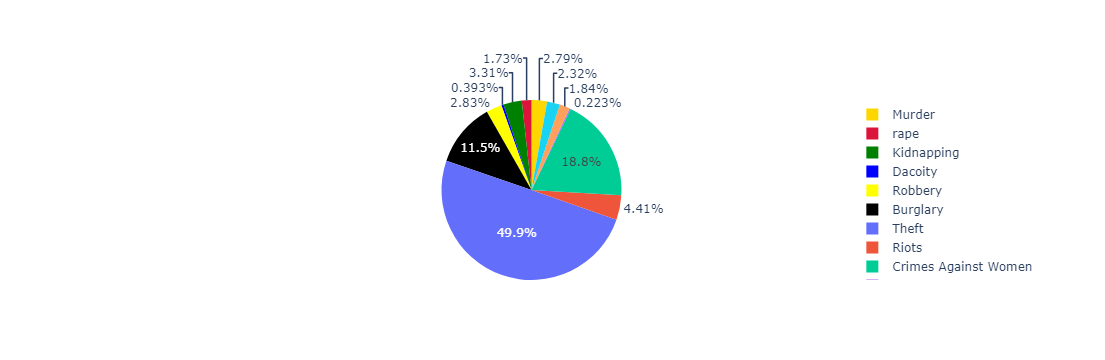

In [112]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=crime_group, values=values,sort=False,
                            marker=dict(colors=colors))])
fig.show()

##### So, Here we can clearly see that Theft is taking 49.9% this is the maximum then crimes against women is taking around 18.8% then Burglary is taking 11.5% and the rest types are taking around 20%

# What needs to be done to reduce crime. 


### Reducing crime is a complex issue with no single solution, but there are several approaches that have shown success:

#### 1. Addressing Root Causes:

##### Investing in education and job opportunities: 
This can help reduce poverty and inequality, which are often linked to crime.

##### Providing mental health and addiction treatment: 
Addressing underlying issues can prevent individuals from turning to crime as a coping mechanism.

##### Improving community resources: 
Strong social safety nets like affordable housing and childcare can provide support and stability, reducing the risk of crime.

#### 2. Focusing on Prevention:

##### Community policing: 
Building trust and positive relationships between police and communities can deter crime and improve public safety.

##### Environmental design: 
Well-maintained and well-lit public spaces can discourage criminal activity.

##### Crime prevention programs: 
These programs can teach young people life skills and conflict resolution techniques, and provide positive alternatives to delinquent behavior.
#### 3. Effective Law Enforcement:

##### Data-driven policing: 
Using data to identify crime hotspots and patterns can help police allocate resources more effectively.

##### Fair and effective criminal justice system: 
This includes addressing racial and socioeconomic disparities in sentencing and incarceration, and focusing on rehabilitation and reintegration of offenders.

##### Community involvement: 
Encouraging residents to report suspicious activity and participate in neighborhood watch programs can help deter crime.

# 4.4  -- (Capstone project overall story in your own words. Min 1000 words)

##### This projects consists of total four phases and each phase is very different from the others.
##### Let's get started

### Phase 1: Data Collection:
The first phase of our project is data collection. This is an important step because it gives us the information we need for the rest of the project. We start by looking for data on the internet. We use search engines like Google and websites like Wikipedia to find information. We also get data from our institute. They give us CSV files that have a lot of useful information.
Collecting data from the internet can be challenging. There is a lot of information on the internet, and not all of it is useful for our project. We have to be careful to choose only the information that is relevant and reliable. The data on the internet is also not always in a format that is easy to use. We have to work to change the data into a format that we can use for our analysis.
The CSV files from our institute are very helpful. They give us a lot of detailed information about different types of crimes. This information is already organized in a way that is easy to use.
Once we have collected all the data, we organize it into a database. This makes it easier for us to use the data in the next phases of our project. The data collection phase is a lot of work, but it is worth it because it gives us the information, we need to understand crime patterns in India.


### Phase 2: Data Analysis:
The second phase of our project is data analysis. This is where we start to make sense of the data we’ve collected. We have a lot of information about different types of crimes, like murder, attempted murder, rape, and many others. We also have data about where these crimes happened and when they happened. Now, we need to look at this data and try to understand what it means.
We start by looking at the total number of crimes. This gives us a big picture view of crime in India. We can see if crime is increasing or decreasing over time. We can also see which states have the most crime and which states have the least crime. To visualize this, we use line plots. Line plots are great for showing changes over time. We plot the years on the x-axis and the total number of crimes on the y-axis. This gives us a clear picture of how crime has changed over time in India.
Next, we look at different types of crimes. We want to know if some types of crimes are more common than others. We also want to know if the rates of different types of crimes are changing over time. For example, is the rate of murder increasing or decreasing? What about the rate of theft or robbery? To answer these questions, we use bar plots. Bar plots are great for comparing different categories. We plot the types of crimes on the x-axis and their frequencies on the y-axis. This gives us a clear picture of which crimes are most common.
We also look at how crime rates vary across different states. Are some states more dangerous than others? Does the type of crime vary from state to state? For example, is murder more common in some states and theft more common in others? To answer these questions, we use scatter plots. Scatter plots are great for showing the relationship between two variables. We plot one variable on the x-axis and another variable on the y-axis. This gives us a clear picture of how two variables are related.
This phase of the project requires a lot of careful thought and attention to detail. We need to make sure we are interpreting the data correctly. We also need to make sure we are not jumping to conclusions based on incomplete or misleading data. By using different types of plots, we can visualize our data in different ways. This helps us understand our data better and draw more accurate conclusions.

    
### Phase 3: Database Management:
The third phase of our project is database management. In this phase, we take the data we’ve collected and organize it into a database. This makes it easier for us to work with the data in the next phases of the project.
Creating a database is a big job. We need to decide how to organize the data. We need to decide what information to include in the database and what information to leave out. We also need to make sure the database is easy to use and understand.
Once we have our database set up, we can start to use it to answer questions about crimes in India. In this phase we get a lot of questions for that we have to write SQL queries to find out or to scraped the specific information from the database. For example, we might write a query to find out which state has the highest rate of a certain type of crime. Or we might write a query to find out how crime rates have changed over time and so on. So, this phase is basically designed to check the depth of our SQL knowledge. 

    
### Phase 4: Machine Learning and Visualization:
The fourth phase of our project is where we delve into the realm of machine learning and data visualization. This phase is crucial as it allows us to extract meaningful insights from our data and present them in a visually intuitive manner.
Our primary tool for this phase is the K-means algorithm, a popular unsupervised machine learning technique used for clustering. The goal of K-means is to group data points into distinct non-overlapping subgroups. In the context of our project, we use K-means to categorize areas into clusters based on crime rates. These clusters represent sensitive areas, moderate areas, and peaceful areas, providing a nuanced understanding of crime patterns across different regions.
The first step in applying the K-means algorithm is to determine the optimal number of clusters. This is where the Elbow method comes into play. The Elbow method involves running the K-means algorithm for a range of values of k (the number of clusters), and for each value of k, calculating the sum of squared distances from each point to its assigned center (also known as within-cluster sum of squares, or WCSS). When we plot WCSS against the number of clusters, the location of a bend (elbow) in the plot is generally considered as an indicator of the appropriate number of clusters.
Once we’ve determined the optimal number of clusters using the Elbow method, we proceed to run the K-means algorithm with that number of clusters. The result is a model that assigns each area in our dataset to one of the clusters, based on the area’s crime rate.
But our work doesn’t stop there. Having categorized the areas into clusters, we now want to visualize our results. Data visualization is a powerful tool that can help make complex data more understandable, accessible, and usable. It allows us to see patterns and trends in the data that might not be obvious from looking at the raw data alone.
For our project, we create visualizations that represent the clusters we’ve identified. These visualizations help us see how the clusters are distributed geographically. We can see which areas are classified as sensitive, which are moderate, and which are peaceful. We can also see how these classifications relate to other variables in our dataset, such as the types of crimes committed in each area.
In conclusion, the fourth phase of our project is where we bring together all the pieces of our work. We apply machine learning techniques to categorize areas based on crime rates, and we use data visualization to present our results in a clear and intuitive manner. This phase is a testament to the power of data science: with the right tools and techniques, we can extract meaningful insights from complex data and present these insights in a way that is accessible to everyone.

    
### Conclusion:
Our project helps us understand crime patterns in India. We use data collection, data analysis, database management, and machine learning to analyse crime data from 2001 to 2012. Our findings can help policymakers and law enforcement agencies make better decisions about how to prevent and respond to crime. Our project also shows the power of data science in understanding complex social issues.

